In [10]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/home/laptop-obs-324/Datasets/Electric_Production.csv',parse_dates=['DATE'], index_col='DATE')
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
train = df.iloc[:-79]

In [5]:
test = df.iloc[-79:]

In [6]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [7]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [11]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(79)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

0.1 0.1 0.1 True
2011-07-01    100.803855
2011-08-01    100.803948
2011-09-01    100.803957
2011-10-01    100.803958
2011-11-01    100.803958
                 ...    
2017-09-01    100.803958
2017-10-01    100.803958
2017-11-01    100.803958
2017-12-01    100.803958
2018-01-01    100.803958
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.813416263993577
0.1 0.2 0.1 True
2011-07-01    100.797552
2011-08-01    100.797740
2011-09-01    100.797759
2011-10-01    100.797761
2011-11-01    100.797761
                 ...    
2017-09-01    100.797761
2017-10-01    100.797761
2017-11-01    100.797761
2017-12-01    100.797761
2018-01-01    100.797761
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.814628448276565
0.1 0.3 0.1 True
2011-07-01    100.791108
2011-08-01    100.791392
2011-09-01    100.791420
2011-10-01    100.791423
2011-11-01    100.791423
                 ...    
2017-09-01    100.791423
2017-10-01    100.791423
2017-11-01    100.791423
2017-12-01    100.791423
2018-01-01    100.791

0.3 0.8 0.1 True
2011-07-01    98.675411
2011-08-01    98.687250
2011-09-01    98.688434
2011-10-01    98.688553
2011-11-01    98.688565
                ...    
2017-09-01    98.688566
2017-10-01    98.688566
2017-11-01    98.688566
2017-12-01    98.688566
2018-01-01    98.688566
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.43448844903488
0.3 0.9 0.1 True
2011-07-01    98.646087
2011-08-01    98.659597
2011-09-01    98.660947
2011-10-01    98.661083
2011-11-01    98.661096
                ...    
2017-09-01    98.661098
2017-10-01    98.661098
2017-11-01    98.661098
2017-12-01    98.661098
2018-01-01    98.661098
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.445164513544073
0.4 0.1 0.1 True
2011-07-01    98.258867
2011-08-01    98.261516
2011-09-01    98.261781
2011-10-01    98.261808
2011-11-01    98.261810
                ...    
2017-09-01    98.261810
2017-10-01    98.261810
2017-11-01    98.261810
2017-12-01    98.261810
2018-01-01    98.261810
Freq: MS, Length: 79, dtype:

2011-07-01    98.740049
2011-08-01    98.785280
2011-09-01    98.789803
2011-10-01    98.790256
2011-11-01    98.790301
                ...    
2017-09-01    98.790306
2017-10-01    98.790306
2017-11-01    98.790306
2017-12-01    98.790306
2018-01-01    98.790306
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.396416414306216
0.6 0.8 0.1 True
2011-07-01    98.779442
2011-08-01    98.831544
2011-09-01    98.836754
2011-10-01    98.837275
2011-11-01    98.837328
                ...    
2017-09-01    98.837333
2017-10-01    98.837333
2017-11-01    98.837333
2017-12-01    98.837333
2018-01-01    98.837333
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.378903334930708
0.6 0.9 0.1 True
2011-07-01    98.820415
2011-08-01    98.879482
2011-09-01    98.885389
2011-10-01    98.885980
2011-11-01    98.886039
                ...    
2017-09-01    98.886045
2017-10-01    98.886045
2017-11-01    98.886045
2017-12-01    98.886045
2018-01-01    98.886045
Freq: MS, Length: 79, dtype: float64
 RMSE i

0.1 0.2 0.2 True
2011-07-01    100.781983
2011-08-01    100.781454
2011-09-01    100.781349
2011-10-01    100.781328
2011-11-01    100.781323
                 ...    
2017-09-01    100.781322
2017-10-01    100.781322
2017-11-01    100.781322
2017-12-01    100.781322
2018-01-01    100.781322
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.81783865702834
0.1 0.3 0.2 True
2011-07-01    100.766867
2011-08-01    100.766086
2011-09-01    100.765930
2011-10-01    100.765898
2011-11-01    100.765892
                 ...    
2017-09-01    100.765890
2017-10-01    100.765890
2017-11-01    100.765890
2017-12-01    100.765890
2018-01-01    100.765890
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.820886563782759
0.1 0.4 0.2 True
2011-07-01    100.751044
2011-08-01    100.750020
2011-09-01    100.749815
2011-10-01    100.749774
2011-11-01    100.749766
                 ...    
2017-09-01    100.749764
2017-10-01    100.749764
2017-11-01    100.749764
2017-12-01    100.749764
2018-01-01    100.7497

2011-07-01    97.942373
2011-08-01    98.003691
2011-09-01    98.015954
2011-10-01    98.018407
2011-11-01    98.018898
                ...    
2017-09-01    98.019020
2017-10-01    98.019020
2017-11-01    98.019020
2017-12-01    98.019020
2018-01-01    98.019020
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.71234241471131
0.4 0.7 0.2 True
2011-07-01    97.899575
2011-08-01    97.973434
2011-09-01    97.988206
2011-10-01    97.991160
2011-11-01    97.991751
                ...    
2017-09-01    97.991899
2017-10-01    97.991899
2017-11-01    97.991899
2017-12-01    97.991899
2018-01-01    97.991899
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.724636746556238
0.4 0.8 0.2 True
2011-07-01    97.860924
2011-08-01    97.947976
2011-09-01    97.965387
2011-10-01    97.968869
2011-11-01    97.969565
                ...    
2017-09-01    97.969739
2017-10-01    97.969739
2017-11-01    97.969739
2017-12-01    97.969739
2018-01-01    97.969739
Freq: MS, Length: 79, dtype: float64
 RMSE is

2011-07-01    100.670519
2011-08-01    100.746507
2011-09-01    100.761705
2011-10-01    100.764744
2011-11-01    100.765352
                 ...    
2017-09-01    100.765504
2017-10-01    100.765504
2017-11-01    100.765504
2017-12-01    100.765504
2018-01-01    100.765504
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.822993159007215
0.8 0.3 0.2 True
2011-07-01    100.848376
2011-08-01    100.963864
2011-09-01    100.986962
2011-10-01    100.991581
2011-11-01    100.992505
                 ...    
2017-09-01    100.992736
2017-10-01    100.992736
2017-11-01    100.992736
2017-12-01    100.992736
2018-01-01    100.992736
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.781380419404044
0.8 0.4 0.2 True
2011-07-01    101.032584
2011-08-01    101.188428
2011-09-01    101.219597
2011-10-01    101.225831
2011-11-01    101.227078
                 ...    
2017-09-01    101.227389
2017-10-01    101.227389
2017-11-01    101.227389
2017-12-01    101.227389
2018-01-01    101.227389
Freq: MS, Len

2011-07-01    99.305071
2011-08-01    99.299083
2011-09-01    99.297287
2011-10-01    99.296748
2011-11-01    99.296587
                ...    
2017-09-01    99.296517
2017-10-01    99.296517
2017-11-01    99.296517
2017-12-01    99.296517
2018-01-01    99.296517
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.214676614519632
0.2 0.7 0.3 True
2011-07-01    99.197667
2011-08-01    99.192453
2011-09-01    99.190889
2011-10-01    99.190419
2011-11-01    99.190279
                ...    
2017-09-01    99.190218
2017-10-01    99.190218
2017-11-01    99.190218
2017-12-01    99.190218
2018-01-01    99.190218
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.250789015654483
0.2 0.8 0.3 True
2011-07-01    99.089852
2011-08-01    99.085982
2011-09-01    99.084821
2011-10-01    99.084473
2011-11-01    99.084368
                ...    
2017-09-01    99.084324
2017-10-01    99.084324
2017-11-01    99.084324
2017-12-01    99.084324
2018-01-01    99.084324
Freq: MS, Length: 79, dtype: float64
 RMSE i

0.6 0.3 0.3 True
2011-07-01    98.622351
2011-08-01    98.768405
2011-09-01    98.812221
2011-10-01    98.825366
2011-11-01    98.829309
                ...    
2017-09-01    98.830999
2017-10-01    98.830999
2017-11-01    98.830999
2017-12-01    98.830999
2018-01-01    98.830999
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.385194857437332
0.6 0.4 0.3 True
2011-07-01    98.700537
2011-08-01    98.904123
2011-09-01    98.965198
2011-10-01    98.983521
2011-11-01    98.989018
                ...    
2017-09-01    98.991374
2017-10-01    98.991374
2017-11-01    98.991374
2017-12-01    98.991374
2018-01-01    98.991374
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.328225205599107
0.6 0.5 0.3 True
2011-07-01    98.798503
2011-08-01    99.063662
2011-09-01    99.143209
2011-10-01    99.167074
2011-11-01    99.174233
                ...    
2017-09-01    99.177301
2017-10-01    99.177301
2017-11-01    99.177301
2017-12-01    99.177301
2018-01-01    99.177301
Freq: MS, Length: 79, dtype

2011-07-01    103.551550
2011-08-01    104.167669
2011-09-01    104.352505
2011-10-01    104.407956
2011-11-01    104.424591
                 ...    
2017-09-01    104.431720
2017-10-01    104.431720
2017-11-01    104.431720
2017-12-01    104.431720
2018-01-01    104.431720
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.79095079781634
0.9 0.7 0.3 True
2011-07-01    103.916513
2011-08-01    104.642231
2011-09-01    104.859946
2011-10-01    104.925260
2011-11-01    104.944855
                 ...    
2017-09-01    104.953252
2017-10-01    104.953252
2017-11-01    104.953252
2017-12-01    104.953252
2018-01-01    104.953252
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.897256529091413
0.9 0.8 0.3 True
2011-07-01    104.284521
2011-08-01    105.120192
2011-09-01    105.370894
2011-10-01    105.446104
2011-11-01    105.468667
                 ...    
2017-09-01    105.478337
2017-10-01    105.478337
2017-11-01    105.478337
2017-12-01    105.478337
2018-01-01    105.478337
Freq: MS, Leng

0.4 0.1 0.4 True
2011-07-01    98.061754
2011-08-01    98.072109
2011-09-01    98.076251
2011-10-01    98.077908
2011-11-01    98.078570
                ...    
2017-09-01    98.079012
2017-10-01    98.079012
2017-11-01    98.079012
2017-12-01    98.079012
2018-01-01    98.079012
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.684828298972473
0.4 0.2 0.4 True
2011-07-01    97.853684
2011-08-01    97.880699
2011-09-01    97.891505
2011-10-01    97.895827
2011-11-01    97.897556
                ...    
2017-09-01    97.898709
2017-10-01    97.898709
2017-11-01    97.898709
2017-12-01    97.898709
2018-01-01    97.898709
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.765078117234932
0.4 0.3 0.4 True
2011-07-01    97.660203
2011-08-01    97.710434
2011-09-01    97.730526
2011-10-01    97.738563
2011-11-01    97.741778
                ...    
2017-09-01    97.743921
2017-10-01    97.743921
2017-11-01    97.743921
2017-12-01    97.743921
2018-01-01    97.743921
Freq: MS, Length: 79, dtype

2011-07-01     99.972493
2011-08-01    100.433176
2011-09-01    100.617449
2011-10-01    100.691158
2011-11-01    100.720642
                 ...    
2017-09-01    100.740298
2017-10-01    100.740298
2017-11-01    100.740298
2017-12-01    100.740298
2018-01-01    100.740298
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.844433996098076
0.7 0.5 0.4 True
2011-07-01    100.252382
2011-08-01    100.859188
2011-09-01    101.101911
2011-10-01    101.199000
2011-11-01    101.237836
                 ...    
2017-09-01    101.263726
2017-10-01    101.263726
2017-11-01    101.263726
2017-12-01    101.263726
2018-01-01    101.263726
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.75774093213456
0.7 0.6 0.4 True
2011-07-01    100.568785
2011-08-01    101.331217
2011-09-01    101.636189
2011-10-01    101.758179
2011-11-01    101.806974
                 ...    
2017-09-01    101.839505
2017-10-01    101.839505
2017-11-01    101.839505
2017-12-01    101.839505
2018-01-01    101.839505
Freq: MS, Leng

0.1 0.8 0.5 True
2011-07-01    100.341303
2011-08-01    100.193219
2011-09-01    100.119177
2011-10-01    100.082156
2011-11-01    100.063646
                 ...    
2017-09-01    100.045135
2017-10-01    100.045135
2017-11-01    100.045135
2017-12-01    100.045135
2018-01-01    100.045135
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.981659819283754
0.1 0.9 0.5 True
2011-07-01    100.244623
2011-08-01    100.077523
2011-09-01     99.993973
2011-10-01     99.952198
2011-11-01     99.931311
                 ...    
2017-09-01     99.910423
2017-10-01     99.910423
2017-11-01     99.910423
2017-12-01     99.910423
2018-01-01     99.910423
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.01750486994866
0.2 0.1 0.5 True
2011-07-01    99.730896
2011-08-01    99.701487
2011-09-01    99.686783
2011-10-01    99.679430
2011-11-01    99.675754
                ...    
2017-09-01    99.672078
2017-10-01    99.672078
2017-11-01    99.672078
2017-12-01    99.672078
2018-01-01    99.672078
Freq: M

2011-07-01    97.654199
2011-08-01    97.724918
2011-09-01    97.760277
2011-10-01    97.777956
2011-11-01    97.786796
                ...    
2017-09-01    97.795636
2017-10-01    97.795636
2017-11-01    97.795636
2017-12-01    97.795636
2018-01-01    97.795636
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.814483698407471
0.5 0.3 0.5 True
2011-07-01    97.472174
2011-08-01    97.609590
2011-09-01    97.678298
2011-10-01    97.712652
2011-11-01    97.729829
                ...    
2017-09-01    97.747006
2017-10-01    97.747006
2017-11-01    97.747006
2017-12-01    97.747006
2018-01-01    97.747006
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.840605018449567
0.5 0.4 0.5 True
2011-07-01    97.338942
2011-08-01    97.564797
2011-09-01    97.677724
2011-10-01    97.734187
2011-11-01    97.762419
                ...    
2017-09-01    97.790651
2017-10-01    97.790651
2017-11-01    97.790651
2017-12-01    97.790651
2018-01-01    97.790651
Freq: MS, Length: 79, dtype: float64
 RMSE i

2011-07-01    100.869933
2011-08-01    101.235677
2011-09-01    101.418549
2011-10-01    101.509985
2011-11-01    101.555703
                 ...    
2017-09-01    101.601421
2017-10-01    101.601421
2017-11-01    101.601421
2017-12-01    101.601421
2018-01-01    101.601421
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.706221482099046
0.8 0.3 0.5 True
2011-07-01    101.259516
2011-08-01    101.858181
2011-09-01    102.157513
2011-10-01    102.307179
2011-11-01    102.382012
                 ...    
2017-09-01    102.456846
2017-10-01    102.456846
2017-11-01    102.456846
2017-12-01    102.456846
2018-01-01    102.456846
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.653853168332299
0.8 0.4 0.5 True
2011-07-01    101.719895
2011-08-01    102.578834
2011-09-01    103.008303
2011-10-01    103.223037
2011-11-01    103.330405
                 ...    
2017-09-01    103.437772
2017-10-01    103.437772
2017-11-01    103.437772
2017-12-01    103.437772
2018-01-01    103.437772
Freq: MS, Len

2011-07-01    99.122226
2011-08-01    98.941786
2011-09-01    98.833523
2011-10-01    98.768564
2011-11-01    98.729590
                ...    
2017-09-01    98.671127
2017-10-01    98.671127
2017-11-01    98.671127
2017-12-01    98.671127
2018-01-01    98.671127
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.42796127132008
0.2 0.4 0.6 True
2011-07-01    98.807148
2011-08-01    98.569146
2011-09-01    98.426345
2011-10-01    98.340665
2011-11-01    98.289256
                ...    
2017-09-01    98.212144
2017-10-01    98.212144
2017-11-01    98.212144
2017-12-01    98.212144
2018-01-01    98.212144
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.609672803037117
0.2 0.5 0.6 True
2011-07-01    98.478400
2011-08-01    98.185843
2011-09-01    98.010308
2011-10-01    97.904988
2011-11-01    97.841796
                ...    
2017-09-01    97.747007
2017-10-01    97.747007
2017-11-01    97.747007
2017-12-01    97.747007
2018-01-01    97.747007
Freq: MS, Length: 79, dtype: float64
 RMSE is

 RMSE is 10.967400899897262
0.5 0.6 0.6 True
2011-07-01    96.615383
2011-08-01    97.137041
2011-09-01    97.450035
2011-10-01    97.637832
2011-11-01    97.750510
                ...    
2017-09-01    97.919527
2017-10-01    97.919527
2017-11-01    97.919527
2017-12-01    97.919527
2018-01-01    97.919527
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.795915795722898
0.5 0.7 0.6 True
2011-07-01    96.634289
2011-08-01    97.388576
2011-09-01    97.841149
2011-10-01    98.112692
2011-11-01    98.275619
                ...    
2017-09-01    98.520008
2017-10-01    98.520008
2017-11-01    98.520008
2017-12-01    98.520008
2018-01-01    98.520008
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.559259410008268
0.5 0.8 0.6 True
2011-07-01    96.745351
2011-08-01    97.774192
2011-09-01    98.391497
2011-10-01    98.761880
2011-11-01    98.984110
                ...    
2017-09-01    99.317454
2017-10-01    99.317454
2017-11-01    99.317454
2017-12-01    99.317454
2018-01-01    99.317454

 RMSE is 12.185836640507464
0.8 0.8 0.6 True
2011-07-01    104.769866
2011-08-01    107.757066
2011-09-01    109.549386
2011-10-01    110.624779
2011-11-01    111.270014
                 ...    
2017-09-01    112.237867
2017-10-01    112.237867
2017-11-01    112.237867
2017-12-01    112.237867
2018-01-01    112.237867
Freq: MS, Length: 79, dtype: float64
 RMSE is 13.510395438804384
0.8 0.9 0.6 True
2011-07-01    105.611638
2011-08-01    109.085337
2011-09-01    111.169556
2011-10-01    112.420088
2011-11-01    113.170407
                 ...    
2017-09-01    114.295885
2017-10-01    114.295885
2017-11-01    114.295885
2017-12-01    114.295885
2018-01-01    114.295885
Freq: MS, Length: 79, dtype: float64
 RMSE is 14.996946875719983
0.9 0.1 0.6 True
2011-07-01    101.907095
2011-08-01    102.157783
2011-09-01    102.308196
2011-10-01    102.398444
2011-11-01    102.452592
                 ...    
2017-09-01    102.533815
2017-10-01    102.533815
2017-11-01    102.533815
2017-12-01    10

Freq: MS, Length: 79, dtype: float64
 RMSE is 13.407409142851527
0.3 0.1 0.7 True
2011-07-01    98.422983
2011-08-01    98.295083
2011-09-01    98.205553
2011-10-01    98.142882
2011-11-01    98.099012
                ...    
2017-09-01    97.996649
2017-10-01    97.996649
2017-11-01    97.996649
2017-12-01    97.996649
2018-01-01    97.996649
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.706512407515651
0.3 0.2 0.7 True
2011-07-01    97.874018
2011-08-01    97.622352
2011-09-01    97.446186
2011-10-01    97.322870
2011-11-01    97.236549
                ...    
2017-09-01    97.035133
2017-10-01    97.035133
2017-11-01    97.035133
2017-12-01    97.035133
2018-01-01    97.035133
Freq: MS, Length: 79, dtype: float64
 RMSE is 11.148310733129236
0.3 0.3 0.7 True
2011-07-01    97.299120
2011-08-01    96.933921
2011-09-01    96.678282
2011-10-01    96.499335
2011-11-01    96.374071
                ...    
2017-09-01    96.081791
2017-10-01    96.081791
2017-11-01    96.081791
2017-12-01

0.6 0.4 0.7 True
2011-07-01    97.534411
2011-08-01    98.001320
2011-09-01    98.328157
2011-10-01    98.556943
2011-11-01    98.717093
                ...    
2017-09-01    99.090776
2017-10-01    99.090776
2017-11-01    99.090776
2017-12-01    99.090776
2018-01-01    99.090776
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.33494894643014
0.6 0.5 0.7 True
2011-07-01     97.656410
2011-08-01     98.466632
2011-09-01     99.033788
2011-10-01     99.430796
2011-11-01     99.708703
                 ...    
2017-09-01    100.357151
2017-10-01    100.357151
2017-11-01    100.357151
2017-12-01    100.357151
2018-01-01    100.357151
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.988299146732933
0.6 0.6 0.7 True
2011-07-01     97.947708
2011-08-01     99.193592
2011-09-01    100.065711
2011-10-01    100.676194
2011-11-01    101.103533
                 ...    
2017-09-01    102.100655
2017-10-01    102.100655
2017-11-01    102.100655
2017-12-01    102.100655
2018-01-01    102.100655
Freq: M

2011-07-01    100.963188
2011-08-01    100.897737
2011-09-01    100.845376
2011-10-01    100.803487
2011-11-01    100.769976
                 ...    
2017-09-01    100.635932
2017-10-01    100.635932
2017-11-01    100.635932
2017-12-01    100.635932
2018-01-01    100.635932
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.839871213002228
0.1 0.2 0.8 True
2011-07-01    101.047194
2011-08-01    100.898394
2011-09-01    100.779355
2011-10-01    100.684124
2011-11-01    100.607938
                 ...    
2017-09-01    100.303198
2017-10-01    100.303198
2017-11-01    100.303198
2017-12-01    100.303198
2018-01-01    100.303198
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.904837936954301
0.1 0.3 0.8 True
2011-07-01    101.038838
2011-08-01    100.791097
2011-09-01    100.592905
2011-10-01    100.434351
2011-11-01    100.307507
                 ...    
2017-09-01     99.800135
2017-10-01     99.800135
2017-11-01     99.800135
2017-12-01     99.800135
2018-01-01     99.800135
Freq: MS, Len

2011-07-01    93.143990
2011-08-01    92.563091
2011-09-01    92.098371
2011-10-01    91.726595
2011-11-01    91.429175
                ...    
2017-09-01    90.239493
2017-10-01    90.239493
2017-11-01    90.239493
2017-12-01    90.239493
2018-01-01    90.239493
Freq: MS, Length: 79, dtype: float64
 RMSE is 15.60242076059581
0.4 0.8 0.8 True
2011-07-01    92.672119
2011-08-01    92.298012
2011-09-01    91.998727
2011-10-01    91.759299
2011-11-01    91.567756
                ...    
2017-09-01    90.801585
2017-10-01    90.801585
2017-11-01    90.801585
2017-12-01    90.801585
2018-01-01    90.801585
Freq: MS, Length: 79, dtype: float64
 RMSE is 15.216243726840776
0.4 0.9 0.8 True
2011-07-01    92.316324
2011-08-01    92.240527
2011-09-01    92.179890
2011-10-01    92.131380
2011-11-01    92.092572
                ...    
2017-09-01    91.937340
2017-10-01    91.937340
2017-11-01    91.937340
2017-12-01    91.937340
2018-01-01    91.937340
Freq: MS, Length: 79, dtype: float64
 RMSE is

 RMSE is 11.43302774692157
0.8 0.5 0.8 True
2011-07-01    102.390610
2011-08-01    104.732983
2011-09-01    106.606882
2011-10-01    108.106001
2011-11-01    109.305296
                 ...    
2017-09-01    114.102475
2017-10-01    114.102475
2017-11-01    114.102475
2017-12-01    114.102475
2018-01-01    114.102475
Freq: MS, Length: 79, dtype: float64
 RMSE is 14.5832604696344
0.8 0.6 0.8 True
2011-07-01    103.520620
2011-08-01    106.802638
2011-09-01    109.428253
2011-10-01    111.528745
2011-11-01    113.209138
                 ...    
2017-09-01    119.930711
2017-10-01    119.930711
2017-11-01    119.930711
2017-12-01    119.930711
2018-01-01    119.930712
Freq: MS, Length: 79, dtype: float64
 RMSE is 19.133922122115205
0.8 0.7 0.8 True
2011-07-01    104.795259
2011-08-01    109.090780
2011-09-01    112.527197
2011-10-01    115.276330
2011-11-01    117.475637
                 ...    
2017-09-01    126.272863
2017-10-01    126.272864
2017-11-01    126.272864
2017-12-01    126.2

2011-07-01    98.384490
2011-08-01    98.096831
2011-09-01    97.837937
2011-10-01    97.604933
2011-11-01    97.395229
                ...    
2017-09-01    95.509078
2017-10-01    95.508959
2017-11-01    95.508853
2017-12-01    95.508757
2018-01-01    95.508671
Freq: MS, Length: 79, dtype: float64
 RMSE is 11.83082265197404
0.3 0.2 0.9 True
2011-07-01    97.565084
2011-08-01    96.932963
2011-09-01    96.364054
2011-10-01    95.852037
2011-11-01    95.391220
                ...    
2017-09-01    91.246474
2017-10-01    91.246214
2017-11-01    91.245980
2017-12-01    91.245770
2018-01-01    91.245580
Freq: MS, Length: 79, dtype: float64
 RMSE is 14.44623218086511
0.3 0.3 0.9 True
2011-07-01    96.669335
2011-08-01    95.696489
2011-09-01    94.820928
2011-10-01    94.032923
2011-11-01    93.323718
                ...    
2017-09-01    86.944876
2017-10-01    86.944476
2017-11-01    86.944117
2017-12-01    86.943793
2018-01-01    86.943501
Freq: MS, Length: 79, dtype: float64
 RMSE is 

 RMSE is 16.537659924168043
0.6 0.8 0.9 True
2011-07-01     97.863033
2011-08-01    101.203585
2011-09-01    104.210082
2011-10-01    106.915929
2011-11-01    109.351192
                 ...    
2017-09-01    131.254821
2017-10-01    131.256195
2017-11-01    131.257430
2017-12-01    131.258543
2018-01-01    131.259544
Freq: MS, Length: 79, dtype: float64
 RMSE is 27.206539782015714
0.6 0.9 0.9 True
2011-07-01     99.209059
2011-08-01    103.993128
2011-09-01    108.298791
2011-10-01    112.173887
2011-11-01    115.661474
                 ...    
2017-09-01    147.030086
2017-10-01    147.032052
2017-11-01    147.033822
2017-12-01    147.035415
2018-01-01    147.036849
Freq: MS, Length: 79, dtype: float64
 RMSE is 40.90080860166237
0.7 0.1 0.9 True
2011-07-01    98.738557
2011-08-01    98.619784
2011-09-01    98.512888
2011-10-01    98.416682
2011-11-01    98.330096
                ...    
2017-09-01    97.551314
2017-10-01    97.551265
2017-11-01    97.551221
2017-12-01    97.551181
20

2011-07-01    102.738100
2011-08-01    102.042016
2011-09-01    101.345932
2011-10-01    100.649848
2011-11-01     99.953764
                 ...    
2017-09-01     51.227877
2017-10-01     50.531793
2017-11-01     49.835709
2017-12-01     49.139624
2018-01-01     48.443540
Freq: MS, Length: 79, dtype: float64
 RMSE is 33.17911457249732
0.1 0.5 0.1 False
2011-07-01    101.596268
2011-08-01    100.481240
2011-09-01     99.366212
2011-10-01     98.251185
2011-11-01     97.136157
                 ...    
2017-09-01     19.084211
2017-10-01     17.969183
2017-11-01     16.854155
2017-12-01     15.739128
2018-01-01     14.624100
Freq: MS, Length: 79, dtype: float64
 RMSE is 52.551282317371935
0.1 0.6 0.1 False
2011-07-01    100.475127
2011-08-01     99.048036
2011-09-01     97.620945
2011-10-01     96.193853
2011-11-01     94.766762
                 ...    
2017-09-01     -5.129630
2017-10-01     -6.556721
2017-11-01     -7.983812
2017-12-01     -9.410904
2018-01-01    -10.837995
Freq: MS, 

2011-07-01    97.262790
2011-08-01    96.865574
2011-09-01    96.468358
2011-10-01    96.071141
2011-11-01    95.673925
                ...    
2017-09-01    67.868788
2017-10-01    67.471572
2017-11-01    67.074355
2017-12-01    66.677139
2018-01-01    66.279923
Freq: MS, Length: 79, dtype: float64
 RMSE is 25.001323906471814
0.5 0.2 0.1 False
2011-07-01    96.012594
2011-08-01    95.110430
2011-09-01    94.208265
2011-10-01    93.306101
2011-11-01    92.403936
                ...    
2017-09-01    29.252427
2017-10-01    28.350263
2017-11-01    27.448099
2017-12-01    26.545934
2018-01-01    25.643770
Freq: MS, Length: 79, dtype: float64
 RMSE is 47.92721982784788
0.5 0.3 0.1 False
2011-07-01    94.769764
2011-08-01    93.468072
2011-09-01    92.166379
2011-10-01    90.864687
2011-11-01    89.562995
                ...    
2017-09-01    -1.555454
2017-10-01    -2.857147
2017-11-01    -4.158839
2017-12-01    -5.460531
2018-01-01    -6.762223
Freq: MS, Length: 79, dtype: float64
 RMSE 

0.8 0.8 0.1 False
2011-07-01    107.345500
2011-08-01    115.620285
2011-09-01    123.895070
2011-10-01    132.169855
2011-11-01    140.444640
                 ...    
2017-09-01    719.679591
2017-10-01    727.954376
2017-11-01    736.229161
2017-12-01    744.503946
2018-01-01    752.778731
Freq: MS, Length: 79, dtype: float64
 RMSE is 377.6375801203237
0.8 0.9 0.1 False
2011-07-01    109.450705
2011-08-01    119.632578
2011-09-01    129.814450
2011-10-01    139.996323
2011-11-01    150.178195
                 ...    
2017-09-01    862.909269
2017-10-01    873.091141
2017-11-01    883.273014
2017-12-01    893.454886
2018-01-01    903.636758
Freq: MS, Length: 79, dtype: float64
 RMSE is 465.594874548717
0.9 0.1 0.1 False
2011-07-01    101.485488
2011-08-01    101.554582
2011-09-01    101.623677
2011-10-01    101.692771
2011-11-01    101.761865
                 ...    
2017-09-01    106.598469
2017-10-01    106.667563
2017-11-01    106.736658
2017-12-01    106.805752
2018-01-01    106.8

 RMSE is 91.14335497698606
0.3 0.5 0.2 False
2011-07-01    94.262918
2011-08-01    91.887015
2011-09-01    89.511113
2011-10-01    87.135210
2011-11-01    84.759308
                ...    
2017-09-01   -81.553866
2017-10-01   -83.929769
2017-11-01   -86.305671
2017-12-01   -88.681574
2018-01-01   -91.057476
Freq: MS, Length: 79, dtype: float64
 RMSE is 115.4201549431797
0.3 0.6 0.2 False
2011-07-01     92.900367
2011-08-01     89.953560
2011-09-01     87.006754
2011-10-01     84.059947
2011-11-01     81.113141
                 ...    
2017-09-01   -125.163325
2017-10-01   -128.110132
2017-11-01   -131.056938
2017-12-01   -134.003745
2018-01-01   -136.950552
Freq: MS, Length: 79, dtype: float64
 RMSE is 142.32079918607585
0.3 0.7 0.2 False
2011-07-01     91.306749
2011-08-01     87.826217
2011-09-01     84.345684
2011-10-01     80.865151
2011-11-01     77.384619
                 ...    
2017-09-01   -166.252666
2017-10-01   -169.733198
2017-11-01   -173.213731
2017-12-01   -176.694264
2

 RMSE is 17.11185906211146
0.7 0.2 0.2 False
2011-07-01    97.953209
2011-08-01    97.572504
2011-09-01    97.191799
2011-10-01    96.811094
2011-11-01    96.430389
                ...    
2017-09-01    69.781037
2017-10-01    69.400332
2017-11-01    69.019627
2017-12-01    68.638922
2018-01-01    68.258216
Freq: MS, Length: 79, dtype: float64
 RMSE is 23.744154673151098
0.7 0.3 0.2 False
2011-07-01    97.577813
2011-08-01    97.352720
2011-09-01    97.127626
2011-10-01    96.902532
2011-11-01    96.677438
                ...    
2017-09-01    80.920880
2017-10-01    80.695786
2017-11-01    80.470692
2017-12-01    80.245599
2018-01-01    80.020505
Freq: MS, Length: 79, dtype: float64
 RMSE is 17.86904852684699
0.7 0.4 0.2 False
2011-07-01     97.624945
2011-08-01     97.946231
2011-09-01     98.267517
2011-10-01     98.588803
2011-11-01     98.910089
                 ...    
2017-09-01    121.400113
2017-10-01    121.721399
2017-11-01    122.042685
2017-12-01    122.363971
2018-01-01  

0.1 0.7 0.3 False
2011-07-01    99.480739
2011-08-01    97.804750
2011-09-01    96.128761
2011-10-01    94.452773
2011-11-01    92.776784
                ...    
2017-09-01   -24.542422
2017-10-01   -26.218411
2017-11-01   -27.894400
2017-12-01   -29.570388
2018-01-01   -31.246377
Freq: MS, Length: 79, dtype: float64
 RMSE is 79.42545962521577
0.1 0.8 0.3 False
2011-07-01    98.602778
2011-08-01    96.756117
2011-09-01    94.909456
2011-10-01    93.062796
2011-11-01    91.216135
                ...    
2017-09-01   -38.050124
2017-10-01   -39.896785
2017-11-01   -41.743446
2017-12-01   -43.590106
2018-01-01   -45.436767
Freq: MS, Length: 79, dtype: float64
 RMSE is 87.84358468815827
0.1 0.9 0.3 False
2011-07-01    97.918068
2011-08-01    95.980190
2011-09-01    94.042312
2011-10-01    92.104433
2011-11-01    90.166555
                ...    
2017-09-01   -45.484913
2017-10-01   -47.422791
2017-11-01   -49.360669
2017-12-01   -51.298547
2018-01-01   -53.236426
Freq: MS, Length: 79, dtyp

2011-07-01    93.622004
2011-08-01    92.088624
2011-09-01    90.555245
2011-10-01    89.021865
2011-11-01    87.488486
                ...    
2017-09-01   -19.848079
2017-10-01   -21.381459
2017-11-01   -22.914838
2017-12-01   -24.448218
2018-01-01   -25.981597
Freq: MS, Length: 79, dtype: float64
 RMSE is 78.14767575547168
0.5 0.5 0.3 False
2011-07-01    92.653424
2011-08-01    91.119825
2011-09-01    89.586226
2011-10-01    88.052627
2011-11-01    86.519028
                ...    
2017-09-01   -20.832901
2017-10-01   -22.366500
2017-11-01   -23.900099
2017-12-01   -25.433698
2018-01-01   -26.967297
Freq: MS, Length: 79, dtype: float64
 RMSE is 79.01274956058607
0.5 0.6 0.3 False
2011-07-01    91.964458
2011-08-01    90.714548
2011-09-01    89.464639
2011-10-01    88.214730
2011-11-01    86.964821
                ...    
2017-09-01    -0.528813
2017-10-01    -1.778722
2017-11-01    -3.028631
2017-12-01    -4.278540
2018-01-01    -5.528449
Freq: MS, Length: 79, dtype: float64
 RMSE i

2011-07-01    101.485488
2011-08-01    101.554582
2011-09-01    101.623677
2011-10-01    101.692771
2011-11-01    101.761865
                 ...    
2017-09-01    106.598469
2017-10-01    106.667563
2017-11-01    106.736658
2017-12-01    106.805752
2018-01-01    106.874846
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.759048133852906
0.9 0.2 0.3 False
2011-07-01    101.645468
2011-08-01    102.012745
2011-09-01    102.380022
2011-10-01    102.747298
2011-11-01    103.114575
                 ...    
2017-09-01    128.823935
2017-10-01    129.191211
2017-11-01    129.558488
2017-12-01    129.925764
2018-01-01    130.293041
Freq: MS, Length: 79, dtype: float64
 RMSE is 18.100621298550394
0.9 0.3 0.3 False
2011-07-01    102.262134
2011-08-01    103.360708
2011-09-01    104.459282
2011-10-01    105.557856
2011-11-01    106.656430
                 ...    
2017-09-01    183.556613
2017-10-01    184.655187
2017-11-01    185.753761
2017-12-01    186.852335
2018-01-01    187.950909
Freq: MS, 

 RMSE is 167.77226569385365
0.3 0.8 0.4 False
2011-07-01     89.699583
2011-08-01     85.851619
2011-09-01     82.003656
2011-10-01     78.155692
2011-11-01     74.307729
                 ...    
2017-09-01   -195.049710
2017-10-01   -198.897673
2017-11-01   -202.745637
2017-12-01   -206.593600
2018-01-01   -210.441564
Freq: MS, Length: 79, dtype: float64
 RMSE is 185.74928203142906
0.3 0.9 0.4 False
2011-07-01     88.322750
2011-08-01     84.343113
2011-09-01     80.363475
2011-10-01     76.383838
2011-11-01     72.404200
                 ...    
2017-09-01   -206.170426
2017-10-01   -210.150063
2017-11-01   -214.129701
2017-12-01   -218.109338
2018-01-01   -222.088976
Freq: MS, Length: 79, dtype: float64
 RMSE is 192.89667092902303
0.4 0.1 0.4 False
2011-07-01    97.569098
2011-08-01    97.177510
2011-09-01    96.785921
2011-10-01    96.394333
2011-11-01    96.002744
                ...    
2017-09-01    68.591548
2017-10-01    68.199960
2017-11-01    67.808371
2017-12-01    67.41678

2011-07-01     97.624945
2011-08-01     97.946231
2011-09-01     98.267517
2011-10-01     98.588803
2011-11-01     98.910089
                 ...    
2017-09-01    121.400113
2017-10-01    121.721399
2017-11-01    122.042685
2017-12-01    122.363971
2018-01-01    122.685258
Freq: MS, Length: 79, dtype: float64
 RMSE is 13.864344308739907
0.7 0.5 0.4 False
2011-07-01     98.160614
2011-08-01     99.451371
2011-09-01    100.742128
2011-10-01    102.032885
2011-11-01    103.323642
                 ...    
2017-09-01    193.676637
2017-10-01    194.967394
2017-11-01    196.258151
2017-12-01    197.548908
2018-01-01    198.839665
Freq: MS, Length: 79, dtype: float64
 RMSE is 54.92918452887972
0.7 0.6 0.4 False
2011-07-01     99.210102
2011-08-01    101.886706
2011-09-01    104.563311
2011-10-01    107.239916
2011-11-01    109.916520
                 ...    
2017-09-01    297.278840
2017-10-01    299.955444
2017-11-01    302.632049
2017-12-01    305.308653
2018-01-01    307.985258
Freq: MS, 

2011-07-01    112.259856
2011-08-01    123.210669
2011-09-01    134.161481
2011-10-01    145.112294
2011-11-01    156.063107
                 ...    
2017-09-01    922.620000
2017-10-01    933.570813
2017-11-01    944.521625
2017-12-01    955.472438
2018-01-01    966.423251
Freq: MS, Length: 79, dtype: float64
 RMSE is 502.7632412760602
0.1 0.1 0.5 False
2011-07-01    101.271544
2011-08-01    101.271734
2011-09-01    101.271924
2011-10-01    101.272115
2011-11-01    101.272305
                 ...    
2017-09-01    101.285630
2017-10-01    101.285820
2017-11-01    101.286010
2017-12-01    101.286201
2018-01-01    101.286391
Freq: MS, Length: 79, dtype: float64
 RMSE is 9.731675383324509
0.1 0.2 0.5 False
2011-07-01    102.612060
2011-08-01    102.605068
2011-09-01    102.598077
2011-10-01    102.591085
2011-11-01    102.584093
                 ...    
2017-09-01    102.094669
2017-10-01    102.087677
2017-11-01    102.080685
2017-12-01    102.073693
2018-01-01    102.066702
Freq: MS, L

2011-07-01     90.969839
2011-08-01     88.386629
2011-09-01     85.803419
2011-10-01     83.220209
2011-11-01     80.636999
                 ...    
2017-09-01   -100.187705
2017-10-01   -102.770915
2017-11-01   -105.354125
2017-12-01   -107.937335
2018-01-01   -110.520545
Freq: MS, Length: 79, dtype: float64
 RMSE is 127.64372548958168
0.4 0.7 0.5 False
2011-07-01     89.850124
2011-08-01     87.263885
2011-09-01     84.677645
2011-10-01     82.091406
2011-11-01     79.505166
                 ...    
2017-09-01   -101.531601
2017-10-01   -104.117841
2017-11-01   -106.704080
2017-12-01   -109.290320
2018-01-01   -111.876559
Freq: MS, Length: 79, dtype: float64
 RMSE is 128.76795632818954
0.4 0.8 0.5 False
2011-07-01    88.993915
2011-08-01    86.621674
2011-09-01    84.249433
2011-10-01    81.877192
2011-11-01    79.504951
                ...    
2017-09-01   -86.551918
2017-10-01   -88.924159
2017-11-01   -91.296400
2017-12-01   -93.668641
2018-01-01   -96.040882
Freq: MS, Length: 79

2011-07-01     99.881461
2011-08-01    100.333811
2011-09-01    100.786161
2011-10-01    101.238511
2011-11-01    101.690861
                 ...    
2017-09-01    133.355358
2017-10-01    133.807708
2017-11-01    134.260058
2017-12-01    134.712408
2018-01-01    135.164758
Freq: MS, Length: 79, dtype: float64
 RMSE is 20.12447687634243
0.8 0.4 0.5 False
2011-07-01    100.538946
2011-08-01    101.896245
2011-09-01    103.253545
2011-10-01    104.610844
2011-11-01    105.968143
                 ...    
2017-09-01    200.979090
2017-10-01    202.336389
2017-11-01    203.693688
2017-12-01    205.050988
2018-01-01    206.408287
Freq: MS, Length: 79, dtype: float64
 RMSE is 59.89180023187126
0.8 0.5 0.5 False
2011-07-01    101.696604
2011-08-01    104.383616
2011-09-01    107.070629
2011-10-01    109.757642
2011-11-01    112.444655
                 ...    
2017-09-01    300.535547
2017-10-01    303.222559
2017-11-01    305.909572
2017-12-01    308.596585
2018-01-01    311.283598
Freq: MS, L

 RMSE is 174.47737035347404
0.3 0.1 0.6 False
2011-07-01    98.623412
2011-08-01    98.311854
2011-09-01    98.000296
2011-10-01    97.688738
2011-11-01    97.377181
                ...    
2017-09-01    75.568138
2017-10-01    75.256581
2017-11-01    74.945023
2017-12-01    74.633465
2018-01-01    74.321908
Freq: MS, Length: 79, dtype: float64
 RMSE is 20.399515584260453
0.3 0.2 0.6 False
2011-07-01    97.610523
2011-08-01    96.764436
2011-09-01    95.918348
2011-10-01    95.072260
2011-11-01    94.226172
                ...    
2017-09-01    35.000032
2017-10-01    34.153944
2017-11-01    33.307856
2017-12-01    32.461768
2018-01-01    31.615681
Freq: MS, Length: 79, dtype: float64
 RMSE is 44.063900617388356
0.3 0.3 0.6 False
2011-07-01    96.434182
2011-08-01    95.059559
2011-09-01    93.684936
2011-10-01    92.310312
2011-11-01    90.935689
                ...    
2017-09-01    -5.287948
2017-10-01    -6.662571
2017-11-01    -8.037195
2017-12-01    -9.411818
2018-01-01   -10.786

2011-07-01     95.035669
2011-08-01     95.688827
2011-09-01     96.341985
2011-10-01     96.995142
2011-11-01     97.648300
                 ...    
2017-09-01    143.369338
2017-10-01    144.022496
2017-11-01    144.675654
2017-12-01    145.328811
2018-01-01    145.981969
Freq: MS, Length: 79, dtype: float64
 RMSE is 24.736006385781963
0.6 0.7 0.6 False
2011-07-01     95.681378
2011-08-01     97.596404
2011-09-01     99.511429
2011-10-01    101.426455
2011-11-01    103.341481
                 ...    
2017-09-01    237.393287
2017-10-01    239.308313
2017-11-01    241.223338
2017-12-01    243.138364
2018-01-01    245.053390
Freq: MS, Length: 79, dtype: float64
 RMSE is 80.74675411099344
0.6 0.8 0.6 False
2011-07-01     96.829683
2011-08-01    100.399585
2011-09-01    103.969487
2011-10-01    107.539390
2011-11-01    111.109292
                 ...    
2017-09-01    361.002446
2017-10-01    364.572349
2017-11-01    368.142251
2017-12-01    371.712153
2018-01-01    375.282055
Freq: MS, 

2011-07-01    103.209894
2011-08-01    102.935625
2011-09-01    102.661356
2011-10-01    102.387087
2011-11-01    102.112818
                 ...    
2017-09-01     82.913994
2017-10-01     82.639725
2017-11-01     82.365456
2017-12-01     82.091187
2018-01-01     81.816919
Freq: MS, Length: 79, dtype: float64
 RMSE is 15.617914001981731
0.1 0.4 0.7 False
2011-07-01    102.738100
2011-08-01    102.042016
2011-09-01    101.345932
2011-10-01    100.649848
2011-11-01     99.953764
                 ...    
2017-09-01     51.227877
2017-10-01     50.531793
2017-11-01     49.835709
2017-12-01     49.139624
2018-01-01     48.443540
Freq: MS, Length: 79, dtype: float64
 RMSE is 33.17911457249732
0.1 0.5 0.7 False
2011-07-01    101.596268
2011-08-01    100.481240
2011-09-01     99.366212
2011-10-01     98.251185
2011-11-01     97.136157
                 ...    
2017-09-01     19.084211
2017-10-01     17.969183
2017-11-01     16.854155
2017-12-01     15.739128
2018-01-01     14.624100
Freq: MS, 

2011-07-01    88.350212
2011-08-01    86.365572
2011-09-01    84.380933
2011-10-01    82.396293
2011-11-01    80.411654
                ...    
2017-09-01   -58.513112
2017-10-01   -60.497751
2017-11-01   -62.482391
2017-12-01   -64.467030
2018-01-01   -66.451670
Freq: MS, Length: 79, dtype: float64
 RMSE is 103.05518765653362
0.5 0.1 0.7 False
2011-07-01    97.262790
2011-08-01    96.865574
2011-09-01    96.468358
2011-10-01    96.071141
2011-11-01    95.673925
                ...    
2017-09-01    67.868788
2017-10-01    67.471572
2017-11-01    67.074355
2017-12-01    66.677139
2018-01-01    66.279923
Freq: MS, Length: 79, dtype: float64
 RMSE is 25.001323906471814
0.5 0.2 0.7 False
2011-07-01    96.012594
2011-08-01    95.110430
2011-09-01    94.208265
2011-10-01    93.306101
2011-11-01    92.403936
                ...    
2017-09-01    29.252427
2017-10-01    28.350263
2017-11-01    27.448099
2017-12-01    26.545934
2018-01-01    25.643770
Freq: MS, Length: 79, dtype: float64
 RMSE

 RMSE is 54.92918452887972
0.7 0.6 0.7 False
2011-07-01     99.210102
2011-08-01    101.886706
2011-09-01    104.563311
2011-10-01    107.239916
2011-11-01    109.916520
                 ...    
2017-09-01    297.278840
2017-10-01    299.955444
2017-11-01    302.632049
2017-12-01    305.308653
2018-01-01    307.985258
Freq: MS, Length: 79, dtype: float64
 RMSE is 117.96783191853308
0.7 0.7 0.7 False
2011-07-01    100.758185
2011-08-01    105.191425
2011-09-01    109.624664
2011-10-01    114.057903
2011-11-01    118.491143
                 ...    
2017-09-01    428.817907
2017-10-01    433.251146
2017-11-01    437.684386
2017-12-01    442.117625
2018-01-01    446.550865
Freq: MS, Length: 79, dtype: float64
 RMSE is 198.49957078909748
0.7 0.8 0.7 False
2011-07-01    102.742371
2011-08-01    109.212892
2011-09-01    115.683413
2011-10-01    122.153934
2011-11-01    128.624454
                 ...    
2017-09-01    581.560908
2017-10-01    588.031429
2017-11-01    594.501949
2017-12-01    

2011-07-01    99.919383
2011-08-01    99.359820
2011-09-01    98.800256
2011-10-01    98.240693
2011-11-01    97.681129
                ...    
2017-09-01    58.511678
2017-10-01    57.952114
2017-11-01    57.392551
2017-12-01    56.832987
2018-01-01    56.273424
Freq: MS, Length: 79, dtype: float64
 RMSE is 29.63197881772611
0.2 0.3 0.8 False
2011-07-01    98.827470
2011-08-01    97.770052
2011-09-01    96.712633
2011-10-01    95.655215
2011-11-01    94.597797
                ...    
2017-09-01    20.578516
2017-10-01    19.521098
2017-11-01    18.463680
2017-12-01    17.406261
2018-01-01    16.348843
Freq: MS, Length: 79, dtype: float64
 RMSE is 52.361368671616866
0.2 0.4 0.8 False
2011-07-01    97.785175
2011-08-01    96.326542
2011-09-01    94.867908
2011-10-01    93.409275
2011-11-01    91.950642
                ...    
2017-09-01   -10.153692
2017-10-01   -11.612326
2017-11-01   -13.070959
2017-12-01   -14.529592
2018-01-01   -15.988226
Freq: MS, Length: 79, dtype: float64
 RMSE 

2011-07-01    91.594490
2011-08-01    90.924583
2011-09-01    90.254677
2011-10-01    89.584770
2011-11-01    88.914863
                ...    
2017-09-01    42.021404
2017-10-01    41.351497
2017-11-01    40.681591
2017-12-01    40.011684
2018-01-01    39.341777
Freq: MS, Length: 79, dtype: float64
 RMSE is 41.631061478650324
0.5 0.8 0.8 False
2011-07-01     91.545335
2011-08-01     91.755664
2011-09-01     91.965992
2011-10-01     92.176321
2011-11-01     92.386649
                 ...    
2017-09-01    107.109652
2017-10-01    107.319980
2017-11-01    107.530309
2017-12-01    107.740638
2018-01-01    107.950966
Freq: MS, Length: 79, dtype: float64
 RMSE is 10.876326894635373
0.5 0.9 0.8 False
2011-07-01     91.841841
2011-08-01     93.260222
2011-09-01     94.678602
2011-10-01     96.096983
2011-11-01     97.515364
                 ...    
2017-09-01    196.802008
2017-10-01    198.220389
2017-11-01    199.638769
2017-12-01    201.057150
2018-01-01    202.475531
Freq: MS, Length: 79

 RMSE is 103.31815174159253
0.9 0.5 0.8 False
2011-07-01    104.867117
2011-08-01    108.680878
2011-09-01    112.494639
2011-10-01    116.308400
2011-11-01    120.122161
                 ...    
2017-09-01    387.085432
2017-10-01    390.899193
2017-11-01    394.712954
2017-12-01    398.526715
2018-01-01    402.340477
Freq: MS, Length: 79, dtype: float64
 RMSE is 174.10010289235356
0.9 0.6 0.8 False
2011-07-01    106.665081
2011-08-01    112.263369
2011-09-01    117.861656
2011-10-01    123.459944
2011-11-01    129.058231
                 ...    
2017-09-01    520.938357
2017-10-01    526.536644
2017-11-01    532.134932
2017-12-01    537.733219
2018-01-01    543.331507
Freq: MS, Length: 79, dtype: float64
 RMSE is 256.19246236813143
0.9 0.7 0.8 False
2011-07-01    108.594491
2011-08-01    116.067411
2011-09-01    123.540330
2011-10-01    131.013250
2011-11-01    138.486169
                 ...    
2017-09-01    661.590534
2017-10-01    669.063453
2017-11-01    676.536373
2017-12-01   

 RMSE is 142.32079918607585
0.3 0.7 0.9 False
2011-07-01     91.306749
2011-08-01     87.826217
2011-09-01     84.345684
2011-10-01     80.865151
2011-11-01     77.384619
                 ...    
2017-09-01   -166.252666
2017-10-01   -169.733198
2017-11-01   -173.213731
2017-12-01   -176.694264
2018-01-01   -180.174796
Freq: MS, Length: 79, dtype: float64
 RMSE is 167.77226569385365
0.3 0.8 0.9 False
2011-07-01     89.699583
2011-08-01     85.851619
2011-09-01     82.003656
2011-10-01     78.155692
2011-11-01     74.307729
                 ...    
2017-09-01   -195.049710
2017-10-01   -198.897673
2017-11-01   -202.745637
2017-12-01   -206.593600
2018-01-01   -210.441564
Freq: MS, Length: 79, dtype: float64
 RMSE is 185.74928203142906
0.3 0.9 0.9 False
2011-07-01     88.322750
2011-08-01     84.343113
2011-09-01     80.363475
2011-10-01     76.383838
2011-11-01     72.404200
                 ...    
2017-09-01   -206.170426
2017-10-01   -210.150063
2017-11-01   -214.129701
2017-12-01   

 RMSE is 249.06744876231446
0.7 0.1 0.9 False
2011-07-01    98.630182
2011-08-01    98.403750
2011-09-01    98.177318
2011-10-01    97.950886
2011-11-01    97.724454
                ...    
2017-09-01    81.874210
2017-10-01    81.647778
2017-11-01    81.421346
2017-12-01    81.194914
2018-01-01    80.968482
Freq: MS, Length: 79, dtype: float64
 RMSE is 17.11185906211146
0.7 0.2 0.9 False
2011-07-01    97.953209
2011-08-01    97.572504
2011-09-01    97.191799
2011-10-01    96.811094
2011-11-01    96.430389
                ...    
2017-09-01    69.781037
2017-10-01    69.400332
2017-11-01    69.019627
2017-12-01    68.638922
2018-01-01    68.258216
Freq: MS, Length: 79, dtype: float64
 RMSE is 23.744154673151098
0.7 0.3 0.9 False
2011-07-01    97.577813
2011-08-01    97.352720
2011-09-01    97.127626
2011-10-01    96.902532
2011-11-01    96.677438
                ...    
2017-09-01    80.920880
2017-10-01    80.695786
2017-11-01    80.470692
2017-12-01    80.245599
2018-01-01    80.0205

In [12]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
80,0.9,0.9,0.1,True,9.627126,-0.000423


In [13]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.9, damping_slope = 0.1 ,optimized=False)

In [14]:
Forecast_custom_pred = fit1.forecast(79)

In [15]:
fit1.summary()

Dep. Variable:,Value,No. Observations:,318
Model:,Holt,SSE,25942.077
Optimized:,False,AIC,1407.699
Trend:,Additive,BIC,1422.748
Seasonal:,None,AICC,1407.969
Seasonal Periods:,None,Date:,"Wed, 15 May 2024"
Box-Cox:,False,Time:,17:20:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.9000000,beta,False


In [16]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 252770.87677840993
MAE is : 436.6862494865477
RMSE is : 502.7632412760602
MAPE is : 429.6432611636119
R2 is : -2727.4576027430912



In [19]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

In [20]:
fitESAUTO.summary()

Dep. Variable:,Value,No. Observations:,318
Model:,Holt,SSE,16753.068
Optimized:,True,AIC,1268.643
Trend:,Additive,BIC,1283.691
Seasonal:,None,AICC,1268.913
Seasonal Periods:,None,Date:,"Wed, 15 May 2024"
Box-Cox:,False,Time:,17:27:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999554,alpha,True
smoothing_trend,6.8677e-07,beta,True


In [21]:
fitESAUTOpred = fitESAUTO.forecast(79)

In [22]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 110.48583865148082
MAE is : 8.93312576085069
RMSE is : 10.511224412573485
MAPE is : 9.06001650308094
R2 is : -0.19260545481411961



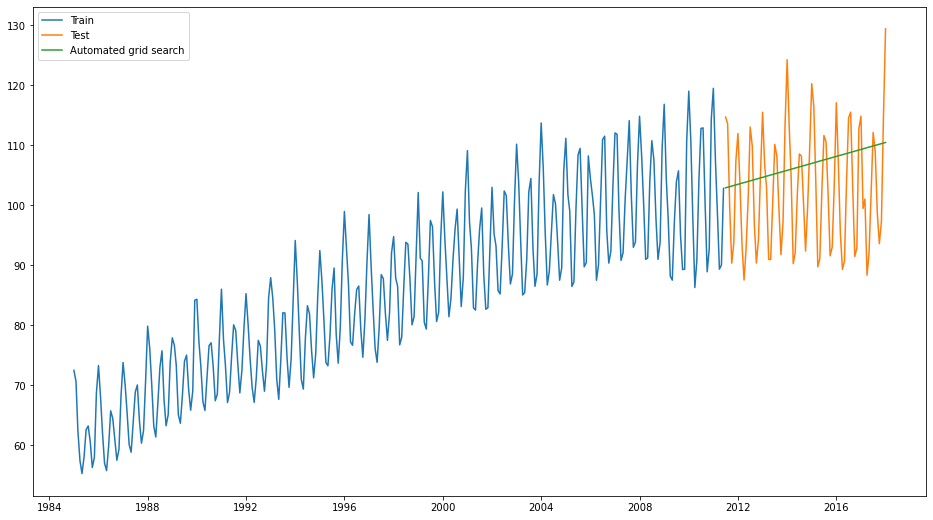

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
# plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()